### Support Vector Machine(SVM)

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [8]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05,random_state=42)
y = np.where(y == 0, 0, 1)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
w = None
b = 0

# Function to initialize the weights and bias
def initialize_parameters(n_features):
    global w, b
    w = np.zeros(n_features)  
    b = 0               

In [4]:
# Function to train the SVM model
def fit(X, y, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
    global w, b
    n_samples, n_features = X.shape  
    initialize_parameters(n_features)  
    y_ = np.where(y <= 0, -1, 1)
    
    # Perform gradient descent for a specified number of iterations
    for _ in range(n_iters):
        for idx, x_i in enumerate(X): 
            condition = y_[idx] * (np.dot(x_i, w) - b) >= 1
            if condition:  # No violation of the margin condition
                w -= learning_rate * (2 * lambda_param * w)
            else:  # Violation of the margin condition
                w -= learning_rate * (2 * lambda_param * w - np.dot(x_i, y_[idx]))
                b -= learning_rate * y_[idx]

In [5]:
# Function to make predictions using the trained model
def predict(X):
    global w, b
    approx = np.dot(X, w) - b
    return np.sign(approx)

In [11]:
fit(X_train, y_train, learning_rate=0.001, lambda_param=0.01, n_iters=1000)
predictions = predict(X_test)
accuracy = accuracy_score(y_test, predictions)

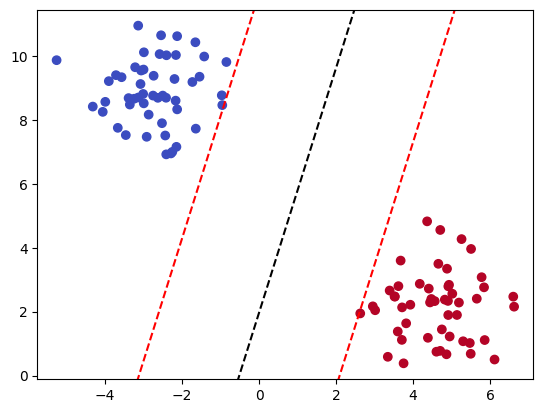

In [10]:
# Function to plot the decision boundary (Credit: https://github.com/patrickloeber/MLfromscratch/blob/master/mlfromscratch/svm.py)
def plot_decision_boundary(X, y):
    # Function to calculate the y-value (x1) of the hyperplane for a given x-value (x0)
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    
    # Create a new figure for the plot
    fig, ax = plt.subplots()
    
    # Plot the data points with their true labels
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, cmap='coolwarm')
    
    # Get the range of x0 values (feature 1)
    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])
    
    # Compute the corresponding x1 values for the decision boundary (hyperplane)
    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)
    
    # Plot the decision boundary
    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k--')
    
    # Compute the corresponding x1 values for the negative margin (hyperplane - 1)
    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'r--')
    
    # Compute the corresponding x1 values for the positive margin (hyperplane + 1)
    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'r--')
    
    # Set plot limits to give some padding around the points
    ax.set_xlim([x0_1 - 0.5, x0_2 + 0.5])
    ax.set_ylim([np.amin(X[:, 1]) - 0.5, np.amax(X[:, 1]) + 0.5])
    
    # Display the plot
    plt.show()

# Plot the decision boundary for the trained SVM model
plot_decision_boundary(X, y)